In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)

---

# Step 0. Adquisicion de datos

## Dataset

https://www.kaggle.com/datasets/pbenavides/house-pricing-lima-peru

In [3]:
# Adquirido de :
# https://www.kaggle.com/datasets/pbenavides/house-pricing-lima-peru

In [25]:
#df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

#df = pd.concat([df_train, df_test]).reset_index(drop=True)
df = pd.read_excel('urbania_data.xlsx',sheet_name="urbania_data")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      7662 non-null   int64  
 1   Unnamed: 0.1                    7662 non-null   int64  
 2   Antiguedad                      7662 non-null   int64  
 3   Anunciante                      7662 non-null   object 
 4   Balneario                       7662 non-null   object 
 5   NroBanios                       7662 non-null   int64  
 6   Nro_pisos                       7662 non-null   int64  
 7   Cocheras                        7662 non-null   int64  
 8   Descripcion                     7662 non-null   object 
 9   Direccion                       7658 non-null   object 
 10  Dormitorios                     7662 non-null   object 
 11  Estado de Inmueble              7662 non-null   object 
 12  Fecha_pub                       76

# 0. Limpieza de columnas

In [27]:
df = df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1", "Area_constr", "Area_total", "Ubicacion","match"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 90 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Antiguedad                      7662 non-null   int64  
 1   Anunciante                      7662 non-null   object 
 2   Balneario                       7662 non-null   object 
 3   NroBanios                       7662 non-null   int64  
 4   Nro_pisos                       7662 non-null   int64  
 5   Cocheras                        7662 non-null   int64  
 6   Descripcion                     7662 non-null   object 
 7   Direccion                       7658 non-null   object 
 8   Dormitorios                     7662 non-null   object 
 9   Estado de Inmueble              7662 non-null   object 
 10  Fecha_pub                       7662 non-null   object 
 11  Luminosidad                     7662 non-null   object 
 12  Mascotas                        76

# 1. Entendimiento del negocio y objetivos del KDD

## Situacion o problema

Cuando se desea comprar una casa, uno generalmente tiene en mente una lista de caracteristicas que busca en ella.  Ya sea la relacionada a la ubicacion (e.g., cercano a algun centro de trabajo, comercio, colegio), vecindario (e.g., clase socio-economica, edad promedio), tamaño, Nro. de cuartos, Nro. de baños, acceso a transporte publico, accesibilidad en carro, Nro. estacionamientos, patio o jardin, clima de la zona, ruido, entre otros.

El principal limitante muchas veces es el presupuesto maximo.  Qué tanto uno esta dispuesto a pagar por una casa que satisfaga todos (o la mayoria) de los requisitos que uno se ha planteado.

Se formulan las siguientes preguntas ¿Cómo se relacionan cada una de estas características con el precio de venta de la casa?  ¿Cómo se relaciona cada una de estas caracteristicas con el valor que uno percibe en la casa?  ¿Estas relaciones entre precio de mercado y valor percibido según cada caracteristica tienen "concordacia"?  ¿Cuáles deberia priorizar? ¿Qué criterios se deberían tener en cuenta para elegir la mejor oferta de casa para el conjunto de caracteristicas que uno busca?


## Objetivo

A partir de la problematica descrita, planteamos:

- Identificar y analizar las principales variables que influyen en los precios de venta de las casas.
- Predecir los precios de venta de casas a partir de sus caracteristicas recolectadas. 


## Poblacion de analisis

- Espacio: Ames, Iowa, USA
- Tiempo: 2006-2010
- Inclusión: Casas residenciales
- Exclusión: Ninguno


## Recursos

- Personas: 4 estudiantes de Ing Informatica PUCP
- Fuente de Datos: Desafío Kaggle, 1460 Casas
- Herramientas: Jupyter Notebook (software libre) como entorno de selección, preprocesamiento, y entrenamiento y despliegue de modelos.


## Limitaciones

- Negocio: Acceso únicamente a los datos brindados por el Desafío Kaggle
- Datos: Se podría ampliar la cantidad de datos si se aumentara el rango de años
- Tiempo: Un semestre académico puede ser corto para cumplir nuestro objetivo de manera completa

# Step 2. Seleccion y entendimiento de datos

## Remover duplicados

In [29]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(7662, 90)
(7645, 90)


## Arreglar los tipos de datos

In [30]:
# Luego de revisar cada columna..

## CATEGORICAS
cat_cols = [
    'Anunciante',
    'Balneario',
    'Descripcion',
    'Direccion',
    'Estado de Inmueble',
    'Luminosidad',
    'Mascotas',
    'Tipo',
    'TipoCochera',
    'Uso_comercial',
    'Uso_profesional',
    "'Cuarto de servicio'",
    "'Deposito'",
    "'Terraza'",
    "'Kitchenette'",
    "'Sala de estar'",
    "'Sotano'",
    "'Patio'",
    "'anx81tico'",
    "'Comedor diario'",
    "'Comedor'",
    "'Banio de servicio'",
    "'Jardanxadn Interno'",
    "'Walking Closet'",
    "'Escritorio'",
    "'Cocina'",
    "'Banio independiente'",
    "'Lavanderanxada'",
    "'Balcon'",
    "'Sala'",
    "'Closet'",
    "'Banio de visitas'",
    "'Agua'",
    "'Guardiananxada'",
    "'Internet'",
    "'Luz'",
    "'Cable'",
    "'Servicio de Limpieza'",
    "'Conexion a gas'",
    "'Sistema de seguridad'",
    "'Telefono'",
    "'Areadeportiva'",
    "'Piscina'",
    "'Solarium'",
    "'Sala de internet'",
    "'Sala de cine'",
    "'Jardanxadn'",
    "'Parque interno'",
    "'Guarderanxada'",
    "'anx81reas verdes'",
    "'Club House'",
    "'Hall de ingreso'",
    "'Areade BBQ'",
    "'Gimnasio'",
    "'Areade sauna'",
    "'Juegos para ninios'",
    "'Ingreso independiente'",
    "'Colegios cercanos'",
    "'Cerca al mar'",
    "'Centros comerciales cercanos'",
    "'Parques cercanos'",
    "'Acceso personas discapacidad'",
    "'Frente al mar'",
    "'Desagaue'",
    "'Jacuzzi'",
    "'Chimenea'",
    "'Intercomunicador'",
    "'Cerco Electrico'",
    "'Parrilla'",
    "'Aire acondicionado'",
    "'Amoblado'",
    "'Sauna'",
    "'Calefaccion'",
    "'Equipado'",
    "'Terma'",
    "'Portero electrico'",
    "'Cocina con reposteros'",
    'latitud',
    'longitud',
    'Distrito',
    'Provincia'    
]

## NUMERICAS
num_cols = [
    'Antiguedad',
    'NroBanios',
    'Nro_pisos',
    'Cocheras',
    'Dormitorios',
    #'fecha_publicacion',
    'Precio',
    'Area_constr_m2',
    'Area_total_m2'

]


## Limpieza de Datos

In [31]:
for col in cat_cols:
    try:
        df[col] = df[col].replace({'NoEspecifica' : np.nan, 'Nulo': np.nan})
    except:
        print(col)

latitud
longitud


In [32]:
df["Dormitorios"] = df["Dormitorios"].replace({"5+" : 5})

In [33]:
df["fecha_publicacion"] = df["Fecha_pub"].apply(lambda x: pd.to_datetime("-".join(x.split(' ')[-1].split('.')[1:]),format = "%m-%y"))

In [34]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
for col in cat_cols:
    df[col] = df[col].astype(object)
    

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7661
Data columns (total 91 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Antiguedad                      7645 non-null   int64         
 1   Anunciante                      7645 non-null   object        
 2   Balneario                       718 non-null    object        
 3   NroBanios                       7645 non-null   int64         
 4   Nro_pisos                       7645 non-null   int64         
 5   Cocheras                        7645 non-null   int64         
 6   Descripcion                     7645 non-null   object        
 7   Direccion                       7641 non-null   object        
 8   Dormitorios                     7645 non-null   int64         
 9   Estado de Inmueble              5021 non-null   object        
 10  Fecha_pub                       7645 non-null   object        
 11  Lumi

In [36]:
df_num = df[num_cols].copy()
df_cat = df[cat_cols].copy()

In [37]:
df = df[df['Tipo']!= 'Departamento'].reset_index(drop=True)

## Variables numericas

### Medidas de resumen para variables numericas

#### Medidas de tendencia central

In [38]:
df_num.describe()

,Antiguedad,NroBanios,Nro_pisos,Cocheras,Dormitorios,Precio,Area_constr_m2,Area_total_m2
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7644.000000
mean,3.079529,3.824068,2.307914,2.401700,4.062263,8.000234e+05,356.372269,618.622187
std,1.907244,1.080388,0.674261,1.498708,0.843943,8.419935e+05,242.156452,848.649958
min,1.000000,1.000000,1.000000,0.000000,1.000000,2.200000e+04,1.000000,1.000000
25%,2.000000,3.000000,2.000000,1.000000,3.000000,3.100000e+05,225.000000,200.000000
50%,3.000000,4.000000,2.000000,2.000000,4.000000,5.780000e+05,313.000000,326.000000
75%,4.000000,5.000000,3.000000,4.000000,5.000000,9.950000e+05,430.000000,688.000000
max,9.000000,5.000000,8.000000,8.000000,5.000000,1.875000e+07,8000.000000,9663.000000


#### Medidas de variabilidad

In [39]:
df_num.var()

Antiguedad        3.637578e+00
NroBanios         1.167239e+00
Nro_pisos         4.546273e-01
Cocheras          2.246125e+00
Dormitorios       7.122400e-01
Precio            7.089531e+11
Area_constr_m2    5.863975e+04
Area_total_m2     7.202068e+05
dtype: float64

In [40]:
# RIC 
df_num.quantile(0.75) - df_num.quantile(0.25)

Antiguedad             2.0
NroBanios              2.0
Nro_pisos              1.0
Cocheras               3.0
Dormitorios            2.0
Precio            685000.0
Area_constr_m2       205.0
Area_total_m2        488.0
dtype: float64

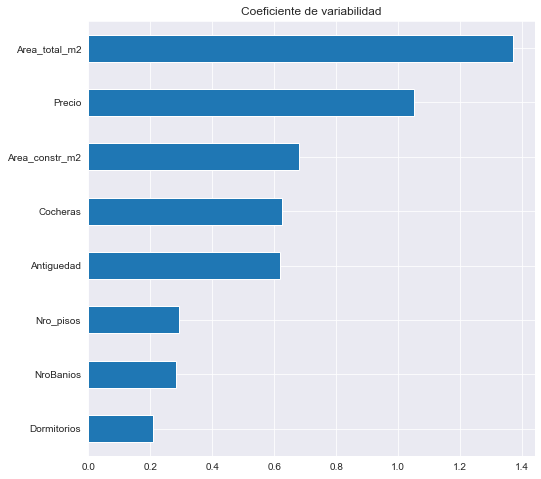

In [41]:
# Coeficientes de variacion
sns.set_style("darkgrid")

plt.figure(figsize=(8,8))
(df_num.std()/df_num.mean()).sort_values(ascending=True).plot.barh()
plt.title("Coeficiente de variabilidad")
plt.show()

### Medidas de deformacion

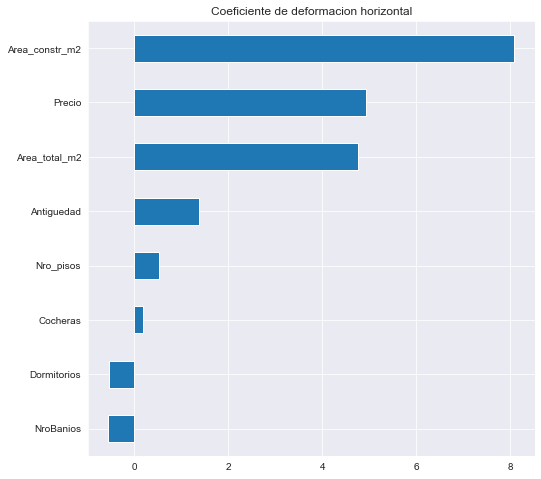

In [42]:
# Deformacion horizontal

sns.set_style("darkgrid")

plt.figure(figsize=(8,8))
df_num.skew().sort_values(ascending=True).plot.barh()
plt.title("Coeficiente de deformacion horizontal")
plt.show()

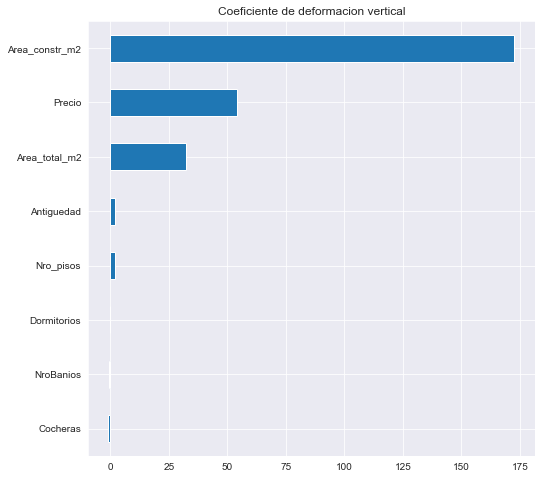

In [43]:
# Deformacion vertical (kurtosis)

sns.set_style("darkgrid")

plt.figure(figsize=(8,8))
df_num.kurt().sort_values(ascending=True).plot.barh()
plt.title("Coeficiente de deformacion vertical")
plt.show()

### Distribuciones

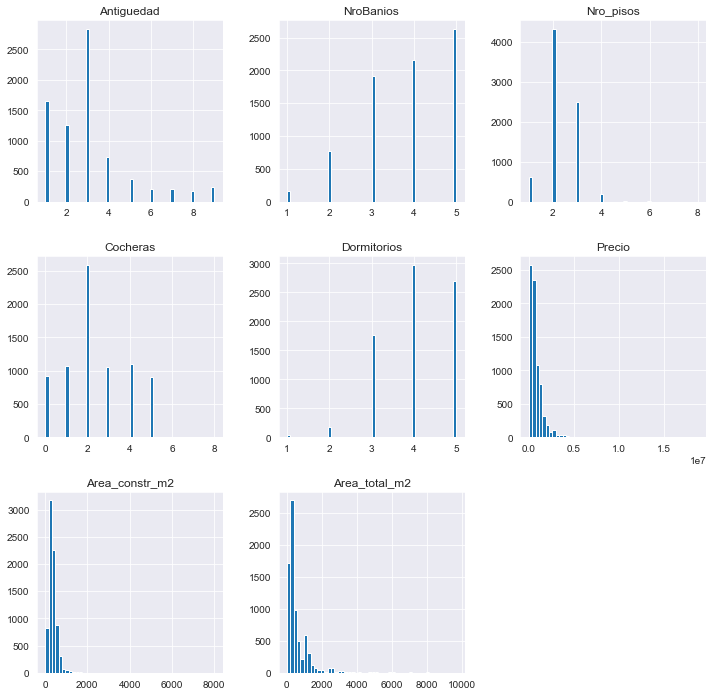

In [44]:
%matplotlib inline
df_num.hist(bins=50, figsize=(12,12))
plt.show()

## Variables categoricas

In [45]:
df_cat.mode()

,Anunciante,Balneario,Descripcion,Direccion,Estado de Inmueble,Luminosidad,Mascotas,Tipo,TipoCochera,Uso_comercial,Uso_profesional,'Cuarto de servicio','Deposito','Terraza','Kitchenette','Sala de estar','Sotano','Patio','anx81tico','Comedor diario','Comedor','Banio de servicio','Jardanxadn Interno','Walking Closet','Escritorio','Cocina','Banio independiente','Lavanderanxada','Balcon','Sala','Closet','Banio de visitas','Agua','Guardiananxada','Internet','Luz','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Telefono','Areadeportiva','Piscina','Solarium','Sala de internet','Sala de cine','Jardanxadn','Parque interno','Guarderanxada','anx81reas verdes','Club House','Hall de ingreso','Areade BBQ','Gimnasio','Areade sauna','Juegos para ninios','Ingreso independiente','Colegios cercanos','Cerca al mar','Centros comerciales cercanos','Parques cercanos','Acceso personas discapacidad','Frente al mar','Desagaue','Jacuzzi','Chimenea','Intercomunicador','Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',latitud,longitud,Distrito,Provincia
0,No disponible,Sarapampa,amplia casa a 1 cuadra de parque !!! 1er piso...,"La Planicie La Molina, La Planicie, Lima, Lima",Muy bueno,Muy luminoso,Si,Casa,Paralelas,No,Si,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-12.082,-76.9282,LaMolina,Lima


## Analisis adicional

In [46]:
corrmat = df_num.corr()

In [47]:
columns = corrmat.nlargest(12, 'Precio')['Precio'].index

In [48]:
corrmat = df_num[columns].corr()

### Revisando la correlacion

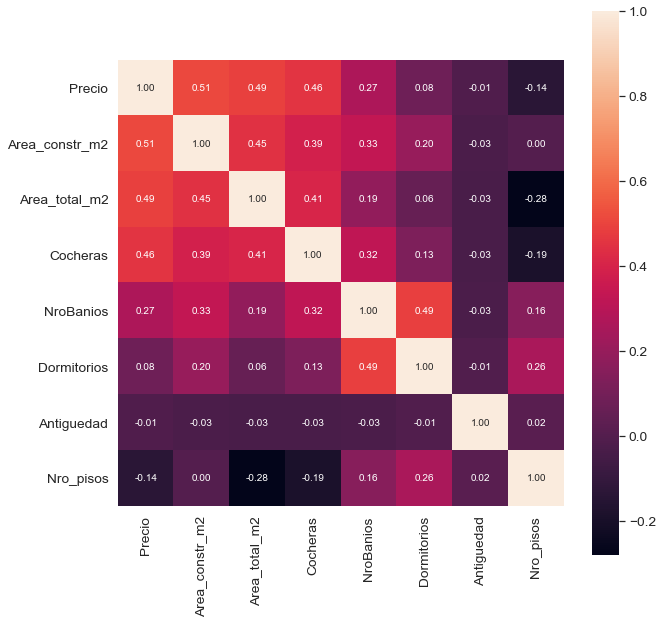

In [49]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
heat_map = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [50]:
ricP = df_num["Precio"].quantile(0.75) - df_num["Precio"].quantile(0.25)
dfprecio = df_num.loc[(df_num["Precio"] >= df_num["Precio"].quantile(0.25) - ricP) & (df_num["Precio"] <= df_num["Precio"].quantile(0.75) + ricP)]

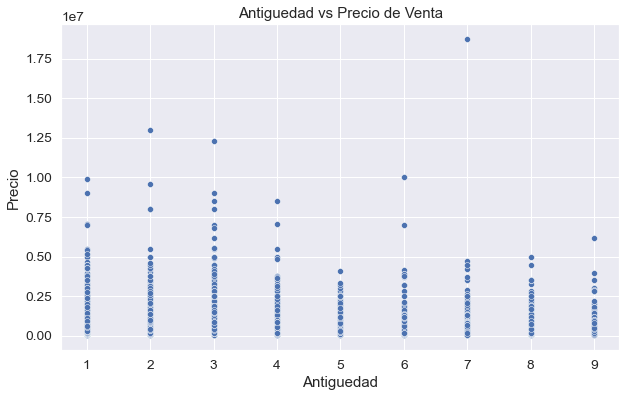

In [51]:
plt.subplots(figsize=(10,6))
plt.title("Antiguedad vs Precio de Venta")
sns.scatterplot(data = df_num, x ="Antiguedad", y="Precio")
plt.show()

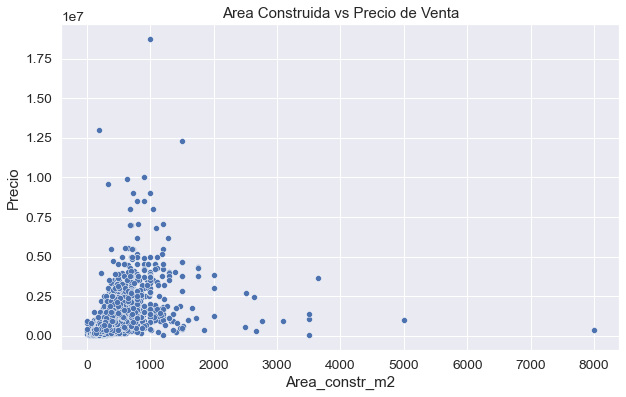

In [52]:
plt.subplots(figsize=(10,6))
plt.title("Area Construida vs Precio de Venta")
sns.scatterplot(data = df_num, x ="Area_constr_m2", y="Precio")
plt.show()

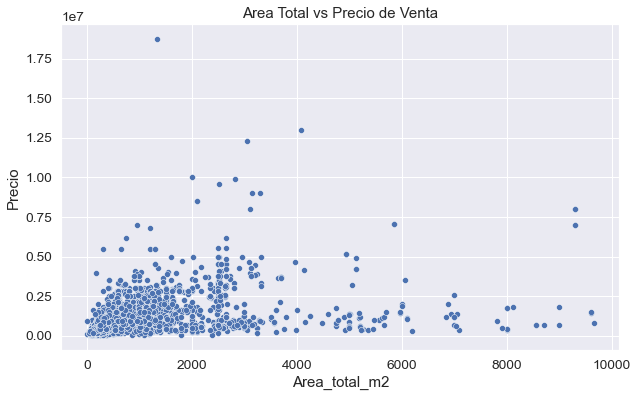

In [53]:
plt.subplots(figsize=(10,6))
plt.title("Area Total vs Precio de Venta")
sns.scatterplot(data = df_num, x ="Area_total_m2", y="Precio")
plt.show()

C:\Users\emili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


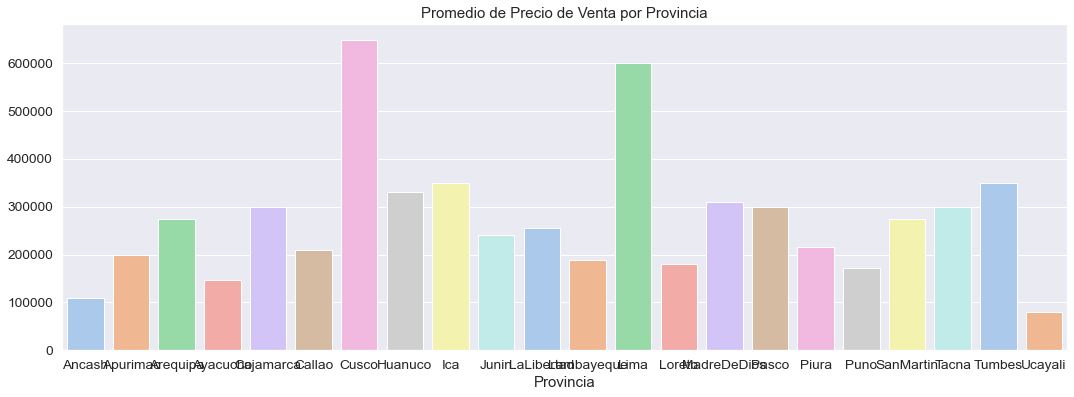

In [54]:
plt.subplots(figsize=(18,6))
plt.title("Promedio de Precio de Venta por Provincia")
sns.set(style="darkgrid")
plot = df.groupby("Provincia")["Precio"].median()
sns.barplot(plot.index,plot.values,palette= "pastel")
plt.show()

C:\Users\emili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


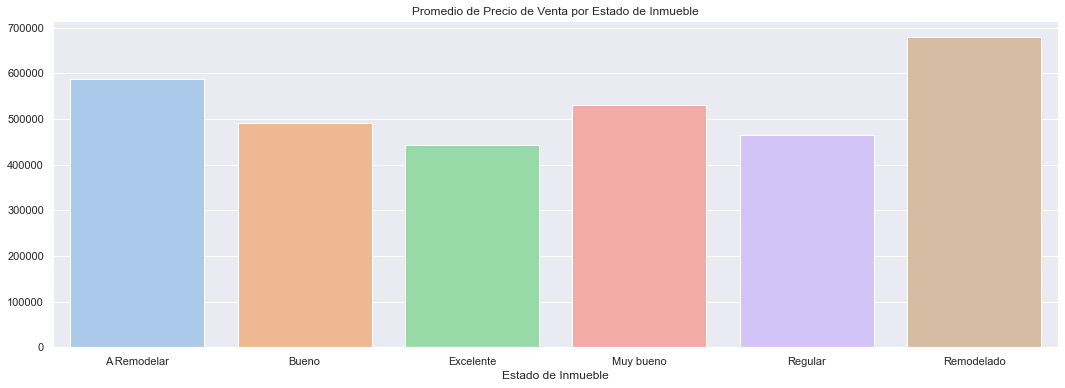

In [55]:
plt.subplots(figsize=(18,6))
plt.title("Promedio de Precio de Venta por Estado de Inmueble")
sns.set(style="darkgrid")
plot = df.groupby("Estado de Inmueble")["Precio"].median()
sns.barplot(plot.index,plot.values,palette= "pastel")
plt.show()

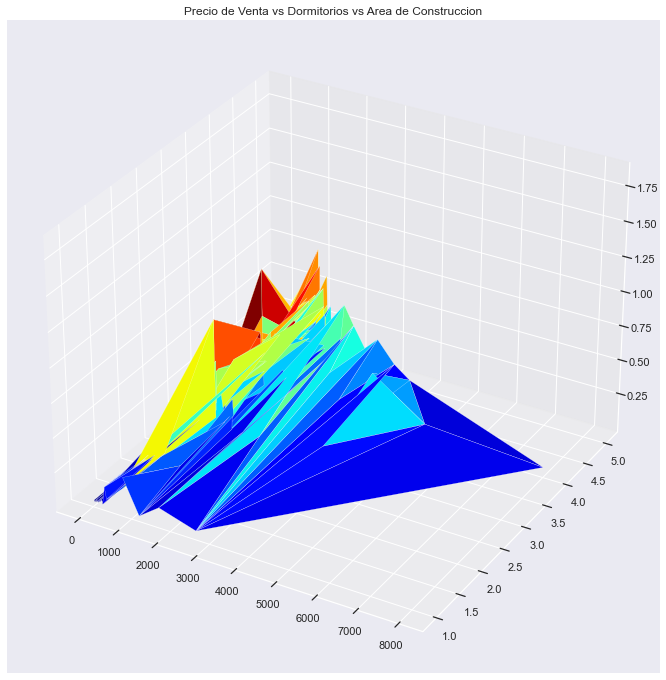

In [56]:
# Make the plot
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Area_constr_m2'], df['Dormitorios'], df['Precio'], cmap=plt.cm.jet, linewidth=0.2)
plt.title("Precio de Venta vs Dormitorios vs Area de Construccion")
plt.show()

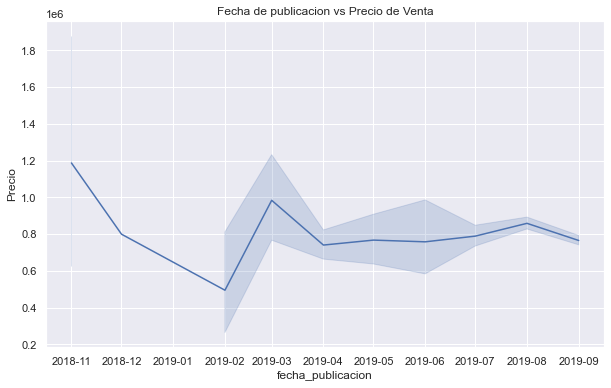

In [57]:
plt.subplots(figsize=(10,6))
plt.title("Fecha de publicacion vs Precio de Venta")
sns.lineplot(data = df, x ="fecha_publicacion", y="Precio")
plt.show()

# Step 3. Preprocesamiento

## Boxplots

<AxesSubplot:>

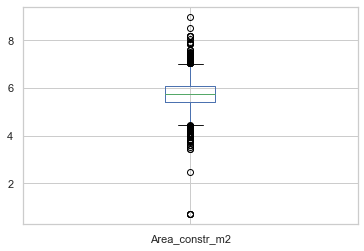

In [65]:
np.log1p(df_num.Area_constr_m2).plot.box()

<AxesSubplot:>

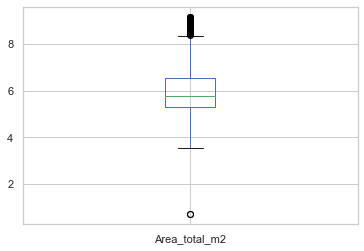

In [66]:
np.log1p(df_num.Area_total_m2).plot.box()

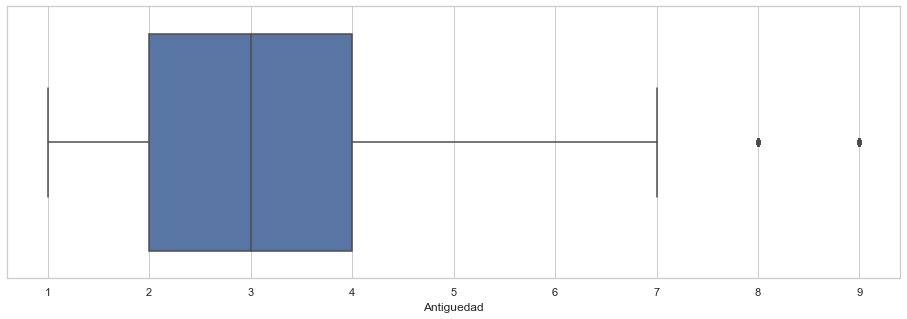

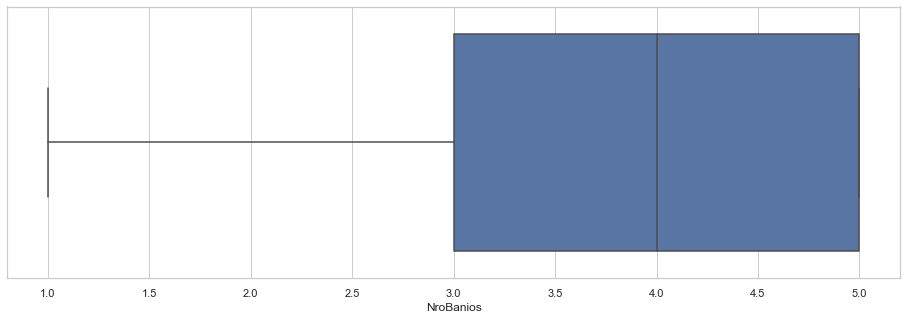

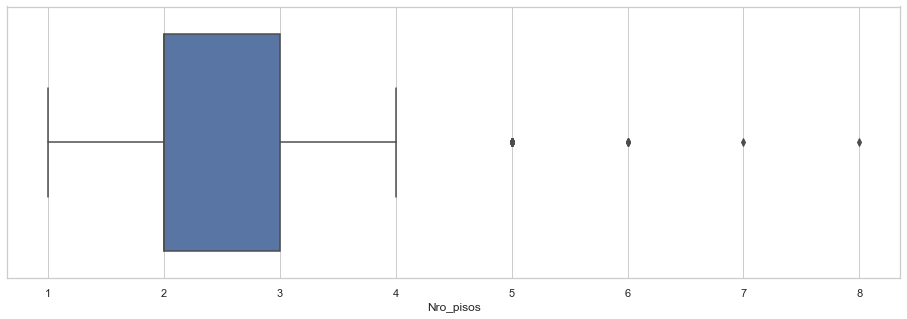

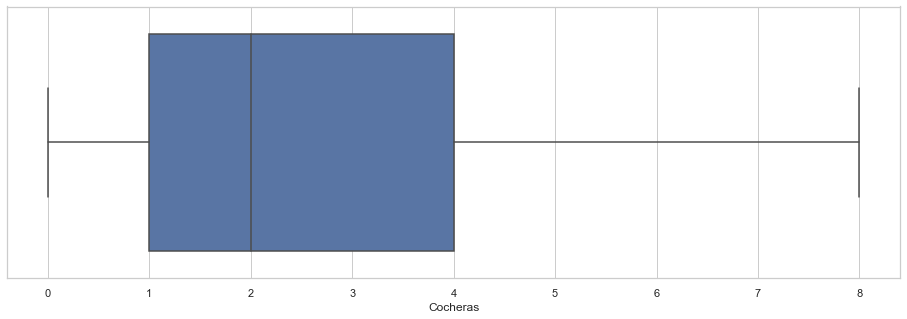

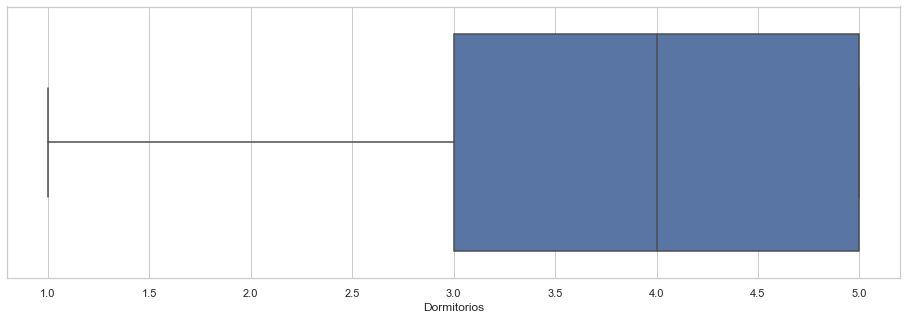

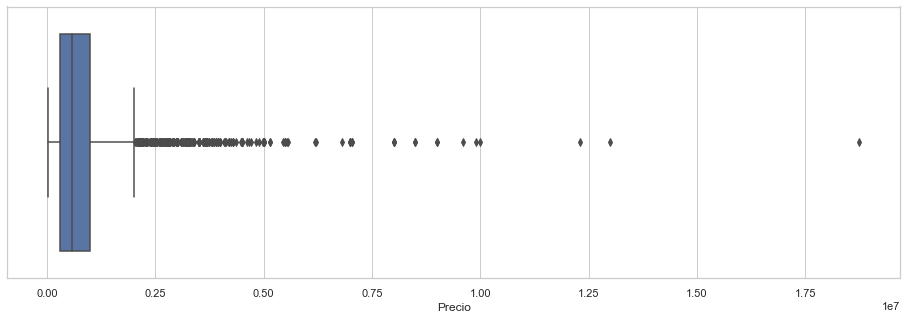

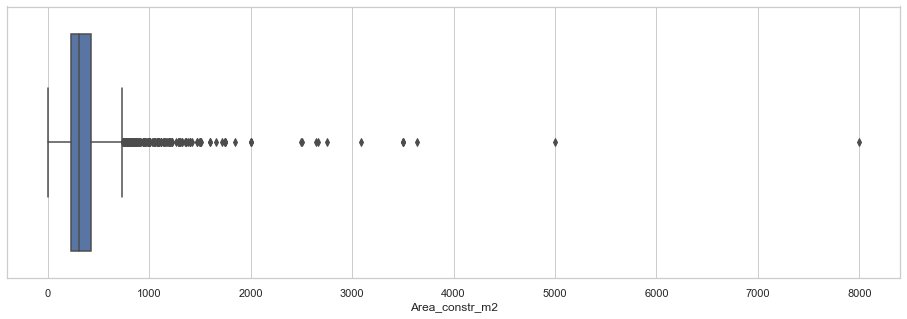

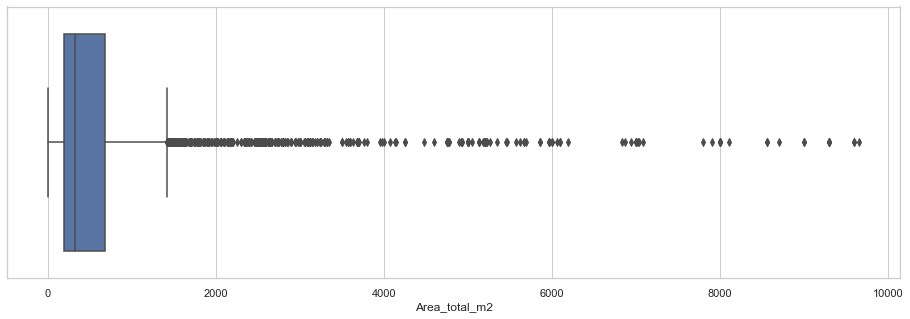

In [58]:
%matplotlib inline

sns.set_theme(style="whitegrid")

for c in df_num.columns:
    plt.figure(figsize=(16, 5))
    sns.boxplot(x=df_num[c])

## Limitar atipicos

In [59]:
print(df_num.columns)
print(df_num.shape)

Index(['Antiguedad', 'NroBanios', 'Nro_pisos', 'Cocheras', 'Dormitorios',
       'Precio', 'Area_constr_m2', 'Area_total_m2'],
      dtype='object')
(7645, 8)


In [60]:
df_num_sinatipicos = df_num.copy(deep=False)
print(df_num_sinatipicos.columns)
print(df_num_sinatipicos.shape)

Index(['Antiguedad', 'NroBanios', 'Nro_pisos', 'Cocheras', 'Dormitorios',
       'Precio', 'Area_constr_m2', 'Area_total_m2'],
      dtype='object')
(7645, 8)


In [61]:
# Segun el analisis de los bloxplots ya generados, se han tomado las siguientes decisiones:

In [67]:
# Se van a mantener las siguientes variables, ya que sus rangos son pequeños y son relevantes para el cálculo del precio de venta.
# Variables: 'Antiguedad', 'Nro_pisos'

# Se van a mantener las siguientes variables, pues no tienen valores atipicos.
# Variables: 'NroBanios', 'Cocheras', 'Dormitorios'

# Se van a mantener las siguientes variables, pues tienen una alta correlacion con el precio, la cual se vería afectada si estas variables se truncan.
# Variables: 'Area_constr_m2', 'Area_total_m2'

# Se va a mantener esta variable porque es la variable dependiente: 'Precio'

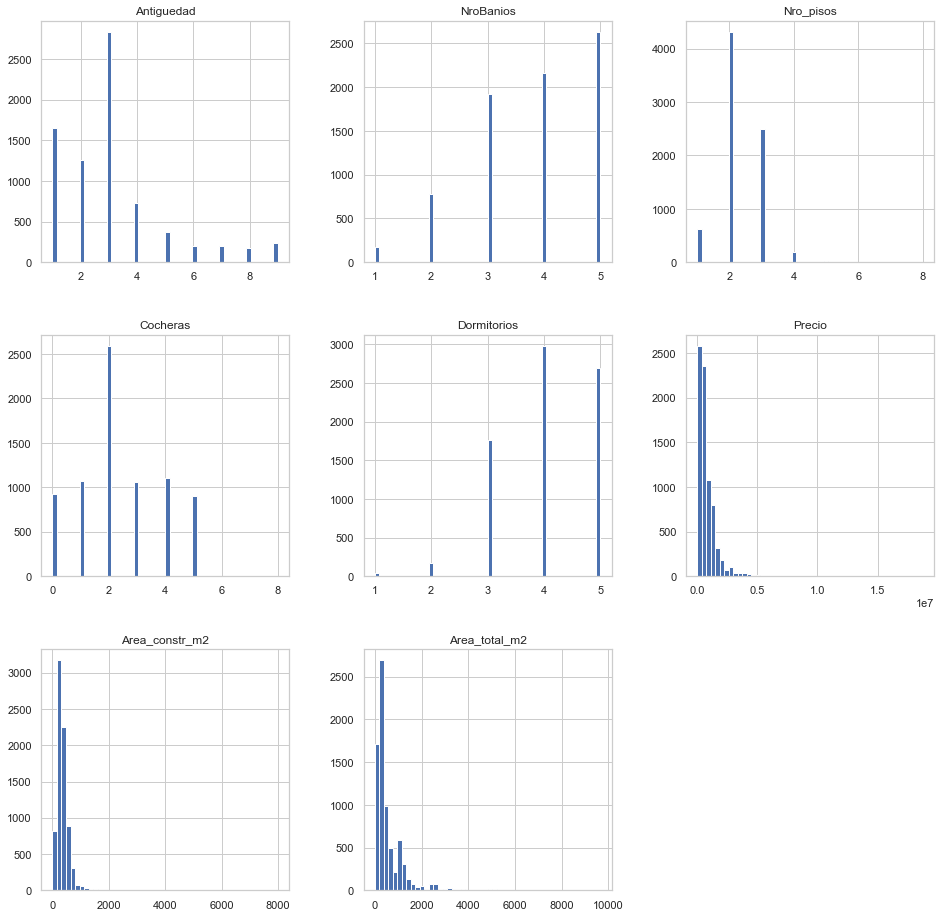

In [68]:
%matplotlib inline
df_num_sinatipicos.hist(bins=50, figsize=(16,16))
plt.show()

## Imputacion de valores perdidos

## Valores nulos

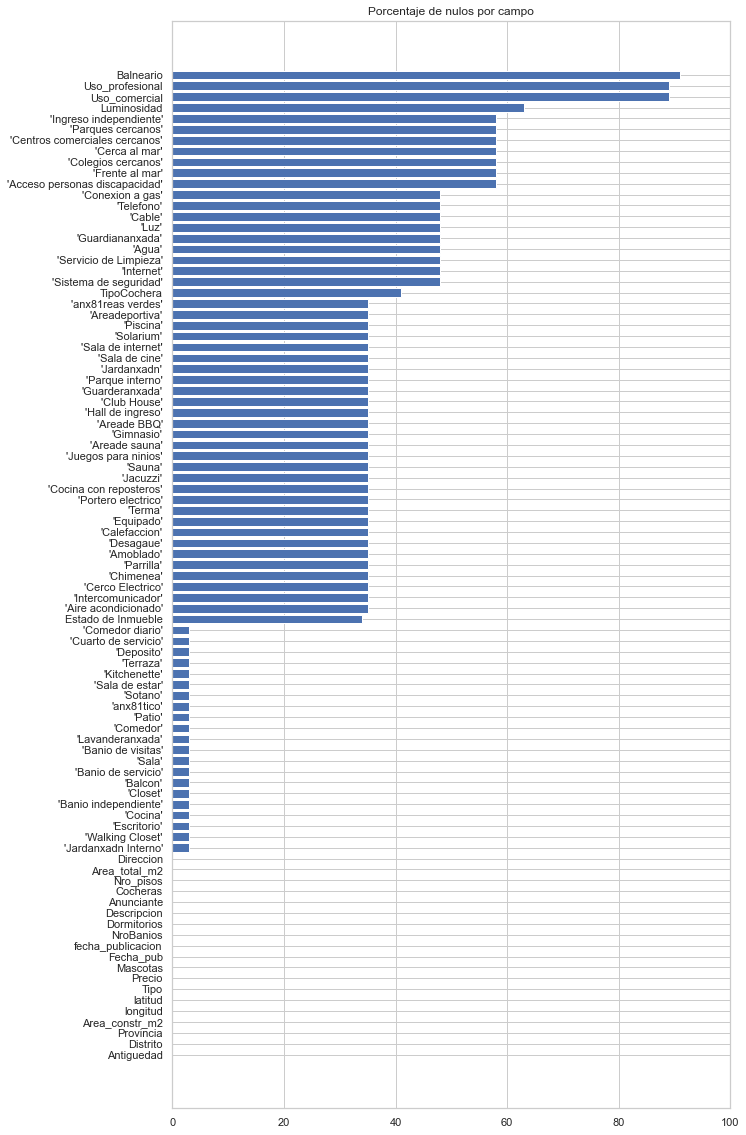

In [69]:
vacios = pd.DataFrame(df.isnull().sum()).sort_values(0,ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/df.shape[0], 2)*100

plt.figure(figsize=(10,20))
vac = np.arange(len(vacios['vacios%']))
plt.barh(vac, vacios['vacios%'])
plt.yticks(vac, vacios.index)
plt.xlim([0, 100])
plt.title("Porcentaje de nulos por campo")
plt.show()

In [73]:
# NaN reemplazar a nueva categoria ND y crear columna que indica que es imputado o no
# Esto será para todas las variables con comillas simple ('variable') y las siguientes categóricas:
# Balneario, Uso_profesional, Uso_comercial, Luminosidad, TipoCochera, Estado de Inmueble

In [74]:
col_impu = [
    'Balneario',
    'Estado de Inmueble',
    'Luminosidad',
    'Uso_comercial',
    'Uso_profesional',
    'TipoCochera',
    "'Cuarto de servicio'",
    "'Deposito'",
    "'Terraza'",
    "'Kitchenette'",
    "'Sala de estar'",
    "'Sotano'",
    "'Patio'",
    "'anx81tico'",
    "'Comedor diario'",
    "'Comedor'",
    "'Banio de servicio'",
    "'Jardanxadn Interno'",
    "'Walking Closet'",
    "'Escritorio'",
    "'Cocina'",
    "'Banio independiente'",
    "'Lavanderanxada'",
    "'Balcon'",
    "'Sala'",
    "'Closet'",
    "'Banio de visitas'",
    "'Agua'",
    "'Guardiananxada'",
    "'Internet'",
    "'Luz'",
    "'Cable'",
    "'Servicio de Limpieza'",
    "'Conexion a gas'",
    "'Sistema de seguridad'",
    "'Telefono'",
    "'Areadeportiva'",
    "'Piscina'",
    "'Solarium'",
    "'Sala de internet'",
    "'Sala de cine'",
    "'Jardanxadn'",
    "'Parque interno'",
    "'Guarderanxada'",
    "'anx81reas verdes'",
    "'Club House'",
    "'Hall de ingreso'",
    "'Areade BBQ'",
    "'Gimnasio'",
    "'Areade sauna'",
    "'Juegos para ninios'",
    "'Ingreso independiente'",
    "'Colegios cercanos'",
    "'Cerca al mar'",
    "'Centros comerciales cercanos'",
    "'Parques cercanos'",
    "'Acceso personas discapacidad'",
    "'Frente al mar'",
    "'Desagaue'",
    "'Jacuzzi'",
    "'Chimenea'",
    "'Intercomunicador'",
    "'Cerco Electrico'",
    "'Parrilla'",
    "'Aire acondicionado'",
    "'Amoblado'",
    "'Sauna'",
    "'Calefaccion'",
    "'Equipado'",
    "'Terma'",
    "'Portero electrico'",
    "'Cocina con reposteros'"
]

In [75]:
for col in col_impu:
    #replace
    df[col] = df[col].replace({np.nan : 'ND'})
    #crear nuevas columnas
    df[col+'_IMP'] = 0
    df.loc[df[col]=='ND',col+'_IMP'] = 1

In [79]:
df.Uso_comercial.value_counts()

ND    6778
No     449
Si     417
Name: Uso_comercial, dtype: int64

In [78]:
df.Uso_comercial_IMP.value_counts()

1    6778
0     866
Name: Uso_comercial_IMP, dtype: int64

### Agrupación de variables categóricas

In [ ]:
# Las variables categóricas Distrito y Provincia poseen categorías con pocas ocurrencias, las cuales se pueden agrupar en una nueva única categoría

In [80]:
# Provincia
df.Provincia.value_counts()

Lima           7112
Callao          119
Lambayeque       83
Piura            68
Ica              58
LaLibertad       41
Arequipa         25
Cusco            22
Junin            17
Ancash           17
Cajamarca        14
Loreto           12
Tacna            11
Tumbes           11
Huanuco           8
Pasco             7
Ucayali           5
SanMartin         5
Apurimac          3
Ayacucho          2
MadreDeDios       2
Puno              2
Name: Provincia, dtype: int64

In [89]:
# Nuestra agrupación será conservar las categorías: Lima y Provincias (para las restantes)
df.loc[~df.Provincia.isin(['Lima']),'Provincia'] = 'Provincia'
df.Provincia.value_counts()

Lima         7112
Provincia     532
Name: Provincia, dtype: int64

In [93]:
# Revisamos la distribución de frecuencia de las categorias de la variable distrito
df.Distrito.value_counts().describe()

count     163.000000
mean       46.895706
std       205.564853
min         1.000000
25%         1.000000
50%         5.000000
75%        20.000000
max      2271.000000
Name: Distrito, dtype: float64

In [99]:
df.Distrito.value_counts().quantile(0.85) #Escogemos un percentil en donde la frecuencia sea menor a 50, pues es poco significativo

49.099999999999966

In [109]:
dfDistritos = df.Distrito.value_counts().reset_index()
dfDistritos

,index,Distrito
0,LaMolina,2271
1,SantiagoDeSurco,1090
2,Asia,588
3,SanIsidro,422
4,Miraflores,291
...,...,...
158,VillaRica,1
159,Mejia,1
160,Amarilis,1
161,Huancabamba,1


In [118]:
distritosMenores50 = dfDistritos[dfDistritos.Distrito<=50]['index'].values

In [119]:
# Nuestra agrupación será conservar las categorías con frecuencia mayor a 50 y las restantes, las agrupamos en Otros
df.loc[df.Distrito.isin(distritosMenores50),'Distrito'] = 'Otros'
df.Distrito.value_counts()

LaMolina               2271
Otros                  1167
SantiagoDeSurco        1090
Asia                    588
SanIsidro               422
Miraflores              291
Chorrillos              254
SanBorja                211
SanMiguel               120
Cieneguilla             112
SanJuanDeLurigancho     100
Chaclacayo               86
SanMartinDePorres        85
Carabayllo               84
Lurin                    84
LosOlivos                80
CerroAzul                80
Ate                      77
Mala                     77
MagdalenaDelMar          71
Pucusana                 64
Comas                    60
Pachacamac               60
PuebloLibre              56
CercadoDeLima            54
Name: Distrito, dtype: int64

# Step 4. Transformacion de datos

In [67]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
for col in cat_cols:
    df[col] = df[col].astype(object)

In [68]:
df_num = df[num_cols].copy()
df_cat = df[cat_cols].copy()

### Distribuciones

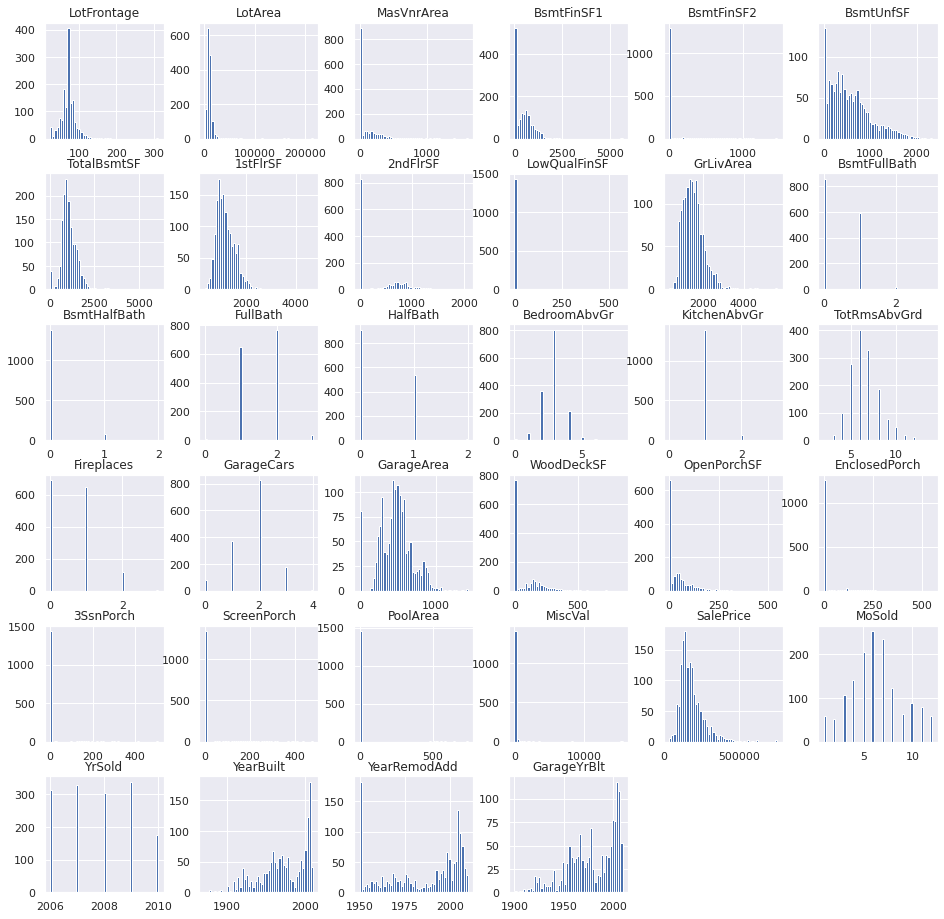

In [69]:
%matplotlib inline
df_num.hist(bins=50, figsize=(16,16))
plt.show()

## Estandarizar

Se estandarizan con z_score todas las columnas numericas excepto:
- BsmtFinSF1:  % respecto TotalBsmtSF
- BsmtFinSF2
- BsmtUnfSF
- LowQualFinSF
- OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch

- MoSold, YrSold, YearBuilt, YearRemodAdd, GarageYrBlt

In [98]:
h = df.copy()

for colname in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']:
    h[colname] = h[colname] / h['TotalBsmtSF']

colname_no_std = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
colname_std = []
for colname in num_cols:
    if colname not in colname_no_std:
        colname_std.append(colname)

In [95]:
def z_score(x):
  x_bar = x.mean()
  s = x.std()
  z_score = (x - x_bar) / s
  return z_score, x_bar, s

In [96]:
for colname in colname_std:
    h[colname], mean, std = z_score(h[colname])
    # print(f'Media: {mean:.2f}')
    # print(f'Desv. estándar: {std:.2f}')
    # print(h[[colname]].sample(5))

In [97]:
df = h

## Discretizar

Se discretizan las variables categoricas a 10 bins del mismo ancho

In [ ]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
#sns.displot(h, x='MSSubClass', hue='bin_MSSubClass', aspect=2, bins=30)

In [107]:
h = df

## Variables dummies

In [108]:
h = df.copy()

t = pd.get_dummies(h["MiscFeature"])
h = h.join(t)

df = h

# Dot product with MiscVale for each column